In [10]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits=pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits=fruits[feature_names_fruits]
y_fruits=fruits['fruit_label']
target_names_fruits=['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test=train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)))
example_fruit = [[8.7, 5.8, 132, 0.73]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of KNN classifier on training set: 0.95
Accuracy of KNN classifier on test set: 1.00
Predicted fruit type for  [[8.7, 5.8, 132, 0.73]]  is  lemon


<IPython.core.display.Javascript object>


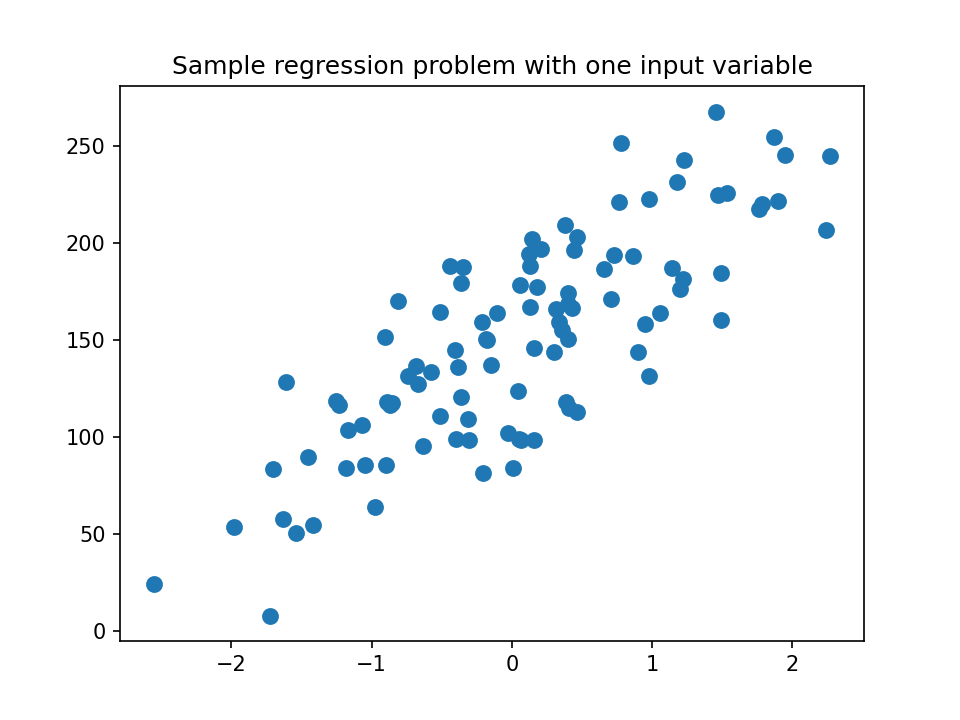

<IPython.core.display.Javascript object>


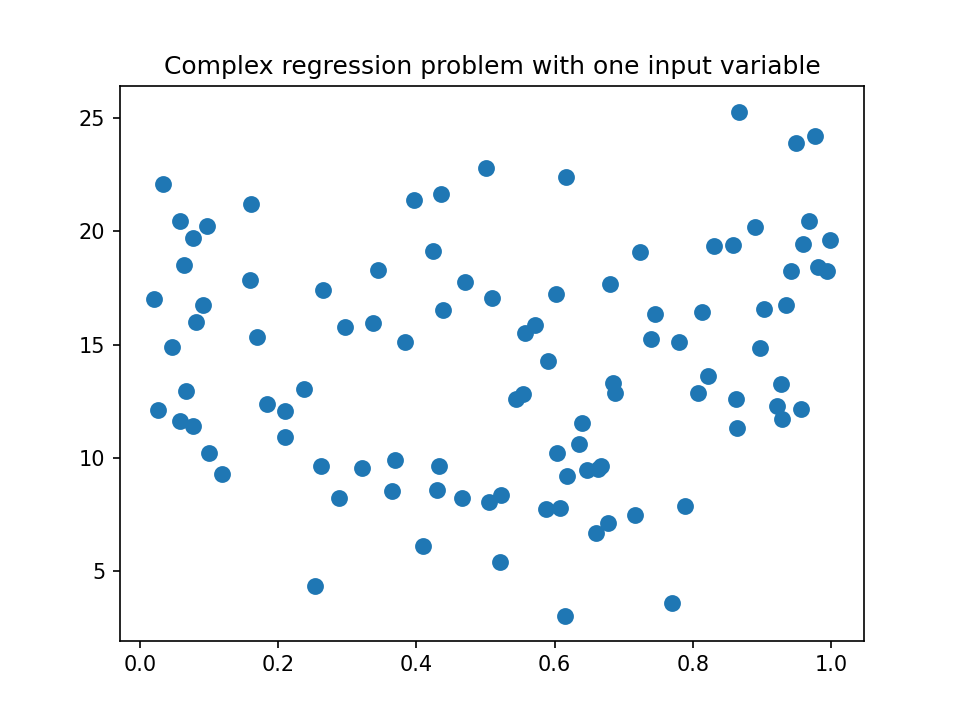

<IPython.core.display.Javascript object>


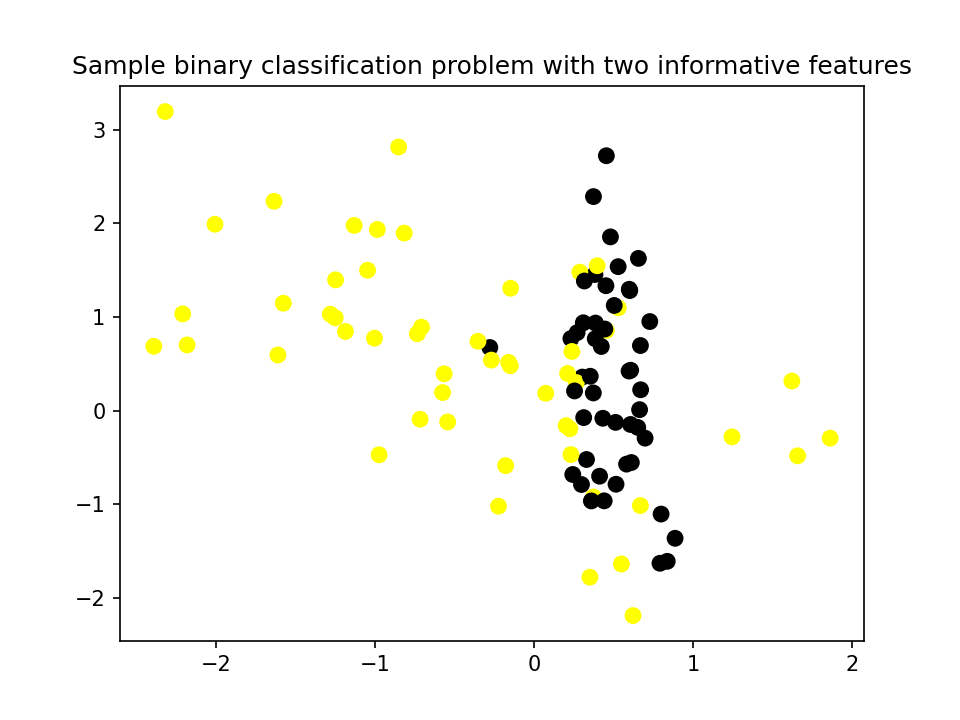

In [12]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold=ListedColormap(['#FFFF00', '#00FF00', '#0000FF', '#000000'])

from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker="o", s=50)
plt.show()

from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1=make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker='o', s=50, cmap=cmap_bold)
plt.show()



<IPython.core.display.Javascript object>


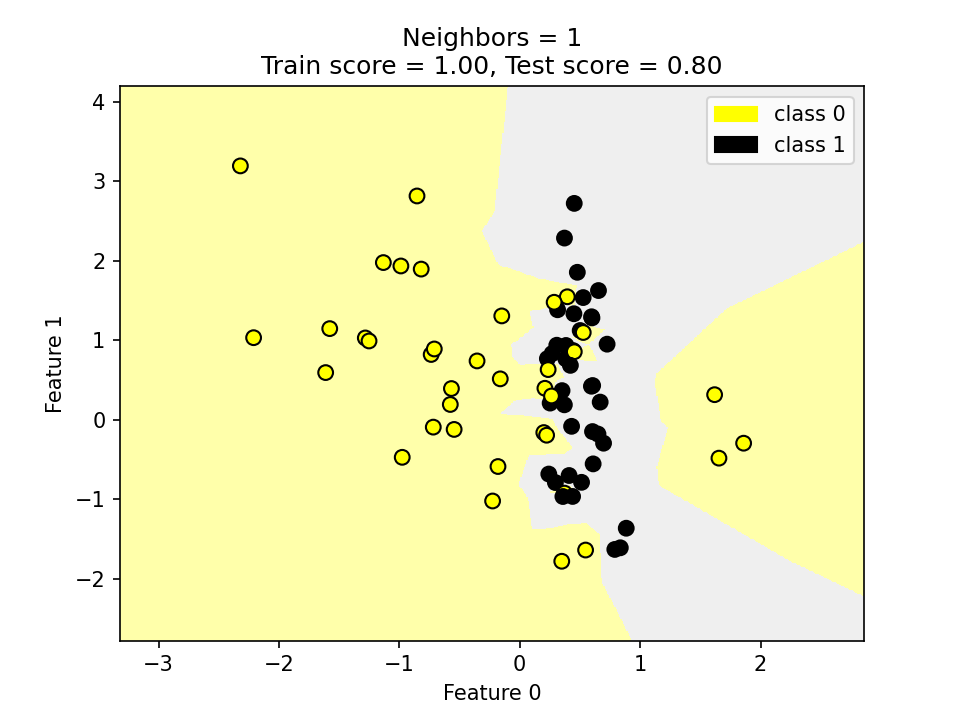

e:\Prodigy\Applied ML in Python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


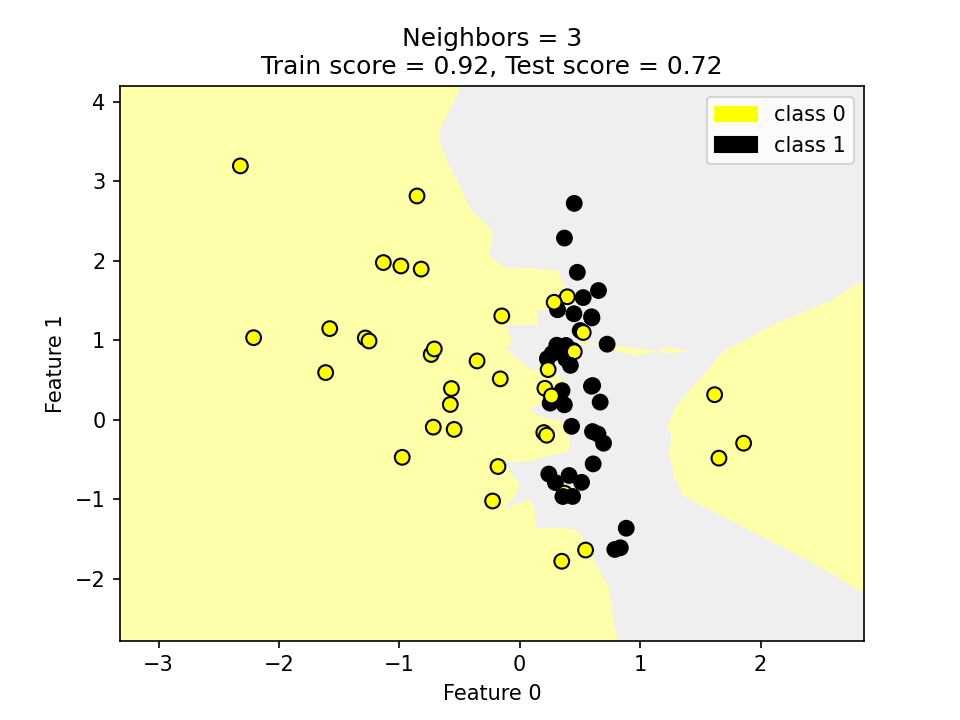

e:\Prodigy\Applied ML in Python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


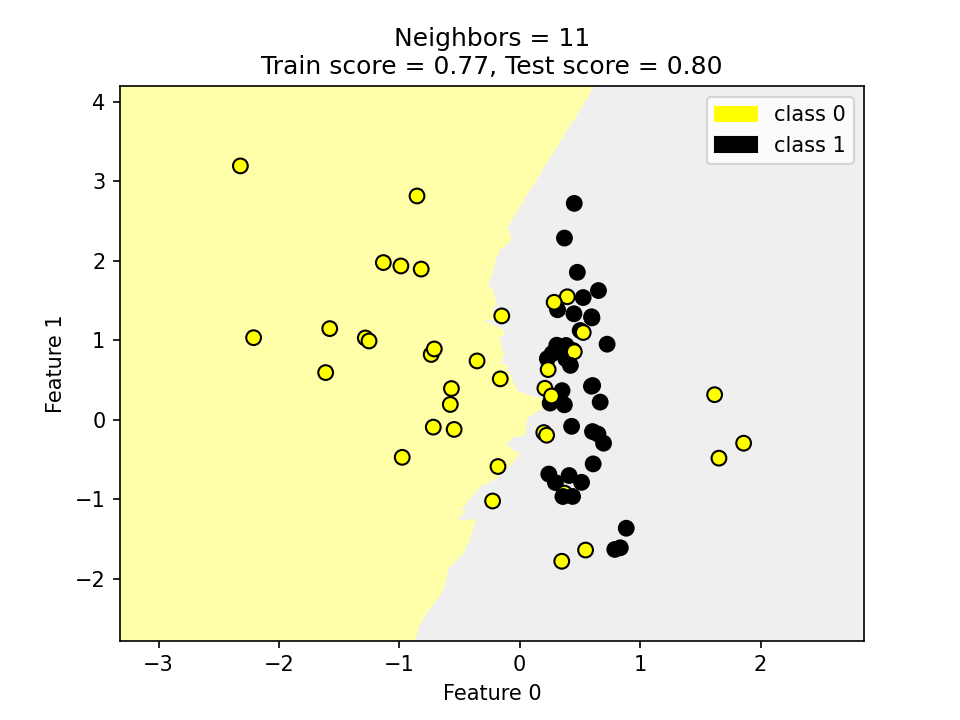

e:\Prodigy\Applied ML in Python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [15]:
from adspy_shared_utilities import plot_two_class_knn
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
knnreg=KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


In [ ]:
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], random_state=0)

for thisaxis, K in zip(subaxes, [1, 3]):
    